# Credit Card Transactions Fraud Detection
- In this classification prediction challenge,I used RandomForest Classifier,LogisticRegression Classifier, XGboostClassifier to detect Fradulent and Legitimate Accounts.
- 

# Import the necessary Libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import log_loss


import warnings
warnings.filterwarnings("ignore") # suppress warnings

# Machine Learning
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score

# chose model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier #provides built-in feature importance scores



In [2]:
train = pd.read_csv("/kaggle/input/fraud-detection/fraudTrain.csv")
test = pd.read_csv("/kaggle/input/fraud-detection/fraudTest.csv")

In [3]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
#Checking the shape of the train and test dataframe
train.shape,test.shape

((1296675, 23), (555719, 23))

In [6]:
train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
train['zip'].head()

0    28654
1    99160
2    83252
3    59632
4    24433
Name: zip, dtype: int64

In [9]:
train['dob'].head()

0    1988-03-09
1    1978-06-21
2    1962-01-19
3    1967-01-12
4    1986-03-28
Name: dob, dtype: object

In [10]:
train['Unnamed: 0'].head()

0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: int64

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [12]:
train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [13]:
test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [14]:
train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [15]:
train.describe(include="object")

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675
unique,1274791,693,14,352,481,2,983,894,51,494,968,1296675
top,2019-04-22 16:02:01,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,0069 Robin Brooks Apt. 695,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9
freq,4,4403,131659,26669,28794,709863,3123,5617,94876,9779,5636,1


In [16]:
# check unique values in dataset
train.apply(lambda x: len(x.unique()))

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

# Visualization

In [17]:
top_categories = train['category'].value_counts().head(5)  # Get the top 5 most common categories
print("Most common transaction categories:")
print(top_categories)

Most common transaction categories:
category
gas_transport    131659
grocery_pos      123638
home             123115
shopping_pos     116672
kids_pets        113035
Name: count, dtype: int64


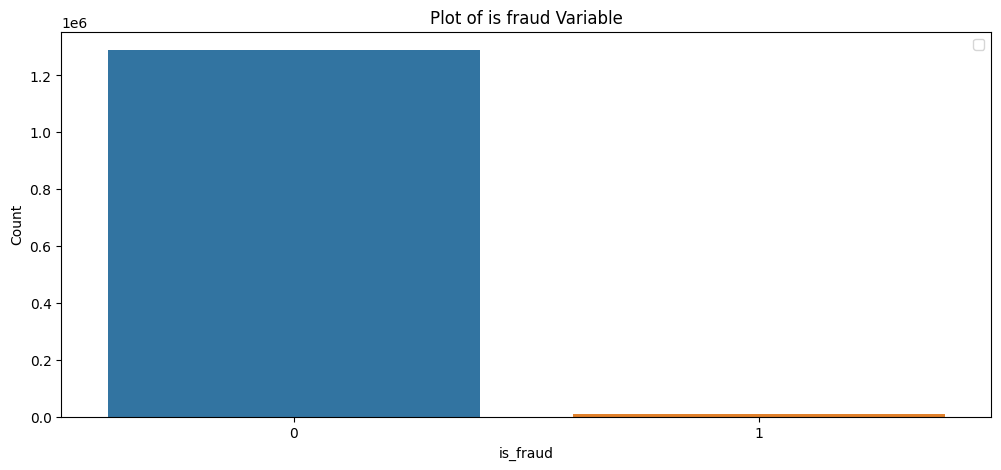

In [18]:
# Explore Target distribution 
plt.figure(figsize = (12,5))
sns.countplot(x='is_fraud', data=train)
plt.title('Plot of is fraud Variable')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.legend()
plt.show()

# 0 here means Legitimate while 1 means Fraudulent. This means that most of the people were legitimate

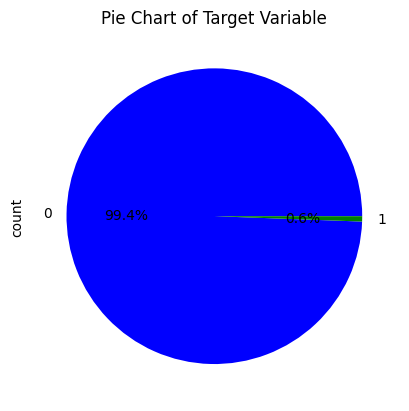

In [19]:
train['is_fraud'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'green'])
plt.title('Pie Chart of Target Variable')
plt.show()

# The pie chart shows tht 99.4% were legitimate and 0.6% fraudulent

gender
F    709863
M    586812
Name: count, dtype: int64


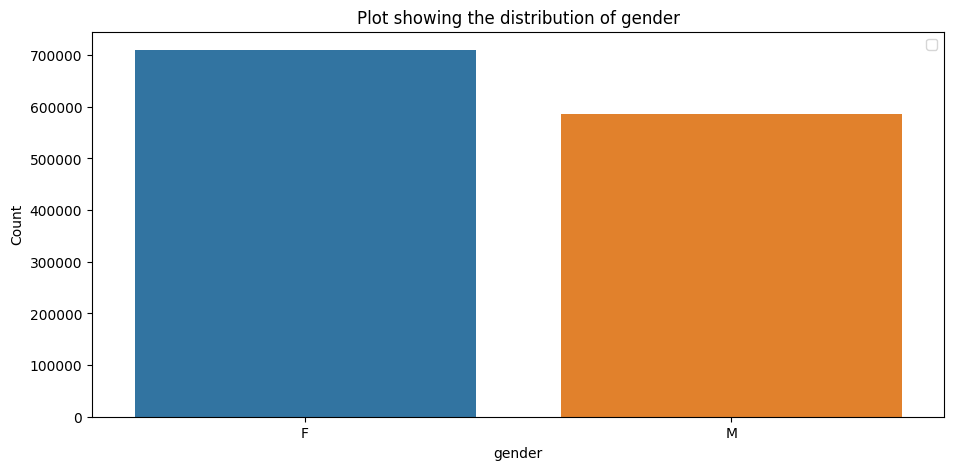

In [20]:
print(train['gender'].value_counts())
plt.figure(figsize=(11,5))
sns.countplot(x='gender', data=train)
plt.title('Plot showing the distribution of gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.legend()
plt.show()

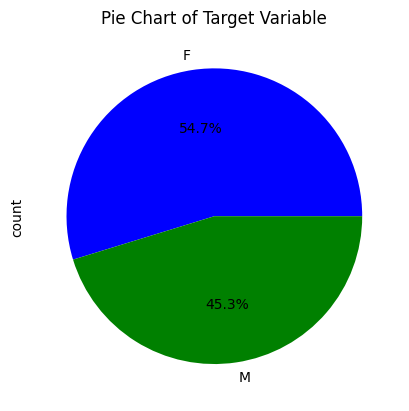

In [21]:
train['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'green'])
plt.title('Pie Chart of Target Variable')
plt.show()

The above shows that 54.7% of the card holders are Females and 45.3

In [22]:
merchant_counts = train['merchant'].value_counts()
top_merchants = merchant_counts.head(10)
print("Top 10 merchants by transaction count:", top_merchants)


Top 10 merchants by transaction count: merchant
fraud_Kilback LLC                   4403
fraud_Cormier LLC                   3649
fraud_Schumm PLC                    3634
fraud_Kuhn LLC                      3510
fraud_Boyer PLC                     3493
fraud_Dickinson Ltd                 3434
fraud_Cummerata-Jones               2736
fraud_Kutch LLC                     2734
fraud_Olson, Becker and Koch        2723
fraud_Stroman, Hudson and Erdman    2721
Name: count, dtype: int64


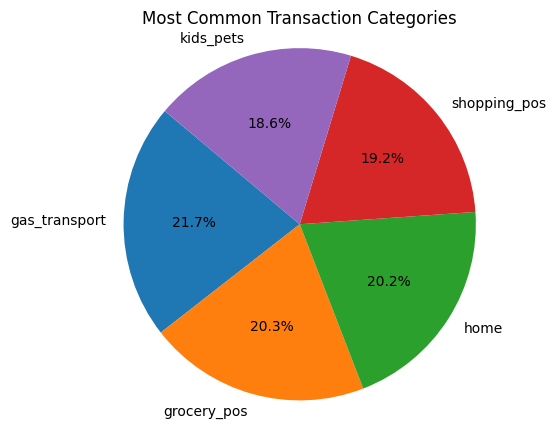

In [23]:
# Create a pie chart
plt.figure(figsize=(5,5))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Most Common Transaction Categories')
plt.axis('equal')
plt.show()

In [24]:
data = pd.concat([train,test])
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [25]:
num_cols = data.select_dtypes(include = "number").columns
num_cols

Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

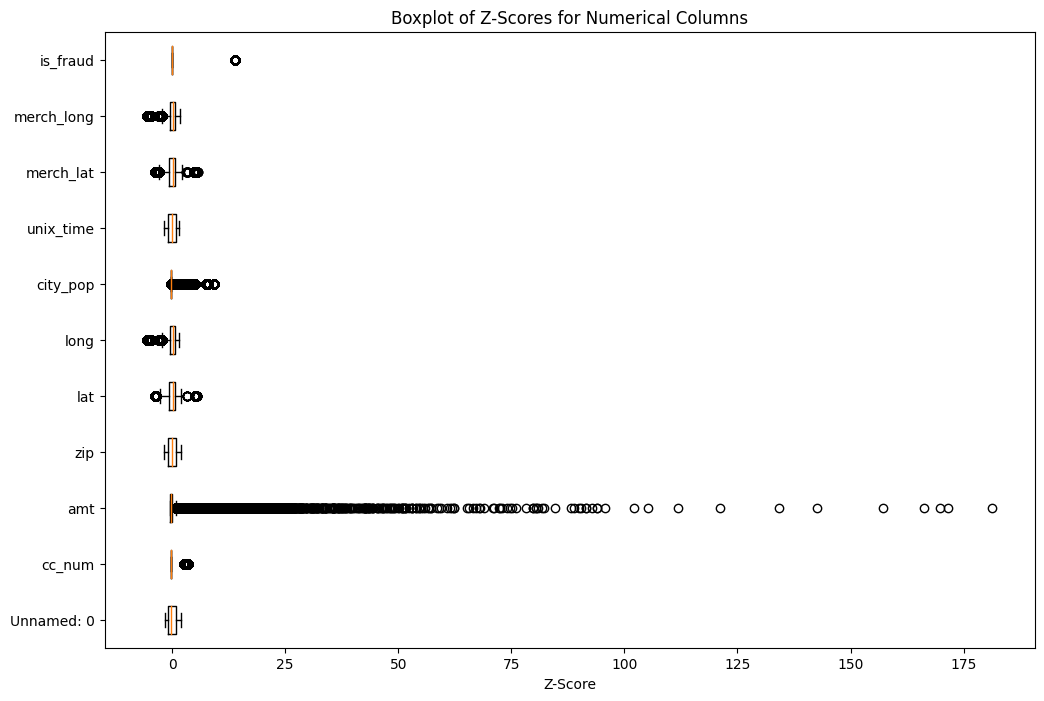

In [26]:
# outlier detection
z_scores = zscore(data[num_cols])

z_scores_data = pd.DataFrame(z_scores, columns=num_cols)

plt.figure(figsize=(12, 8))
plt.boxplot(z_scores_data.values, labels=num_cols, vert=False)
plt.title('Boxplot of Z-Scores for Numerical Columns')
plt.xlabel('Z-Score')
plt.show()

In [27]:
# Define a function to remove outliers using Box-Cox transformation
def remove_outliers_boxcox(data):
    # Added a small constant to handle zero and negative values--close to one
    data = data - data.min() + 1e-6
    transformed_data, _ = boxcox(data)
    return transformed_data

# Apply Box-Cox transformation to numerical columns
transformed_numerical_columns = data[num_cols].apply(remove_outliers_boxcox)
transformed_numerical_columns

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,-2.007051e+00,63.430329,1.579646,1171.877037,18.086983,16175.125592,8.775121,-1.349143,23.992586,80192.821006,-1.639975e+82
1,9.999997e-07,41.738803,7.568945,2681.632452,35.160662,4099.442591,5.051038,13.745708,48.500851,17103.955736,-1.639975e+82
2,8.277387e-01,51.867724,9.481069,2389.774674,26.105995,5429.651173,8.976426,16.663264,36.963487,23679.591671,-1.639975e+82
3,1.462111e+00,64.211182,5.574315,1916.272987,31.547090,5465.575894,8.091201,26.009763,44.363552,23192.883995,-1.639975e+82
4,1.996496e+00,57.868821,5.426714,1051.056047,21.136090,16967.509829,4.502414,58.828962,28.726073,89497.972690,-1.639975e+82
...,...,...,...,...,...,...,...,...,...,...,...
555714,1.451401e+03,51.255051,5.515618,1996.889011,23.864723,11714.362529,6.563211,815892.888889,31.032508,58090.901730,-1.639975e+82
555715,1.451403e+03,64.229763,7.673918,2280.729447,9.197482,10417.624748,11.265200,815892.908038,13.334748,48292.482902,-1.639975e+82
555716,1.451404e+03,65.777569,7.056208,2684.532780,31.501066,3958.777794,8.836453,815892.965487,43.637727,15649.461492,-1.639975e+82
555717,1.451405e+03,46.267410,2.359657,2397.174088,29.380494,4470.803554,4.862911,815893.051660,39.453703,18207.967553,-1.639975e+82


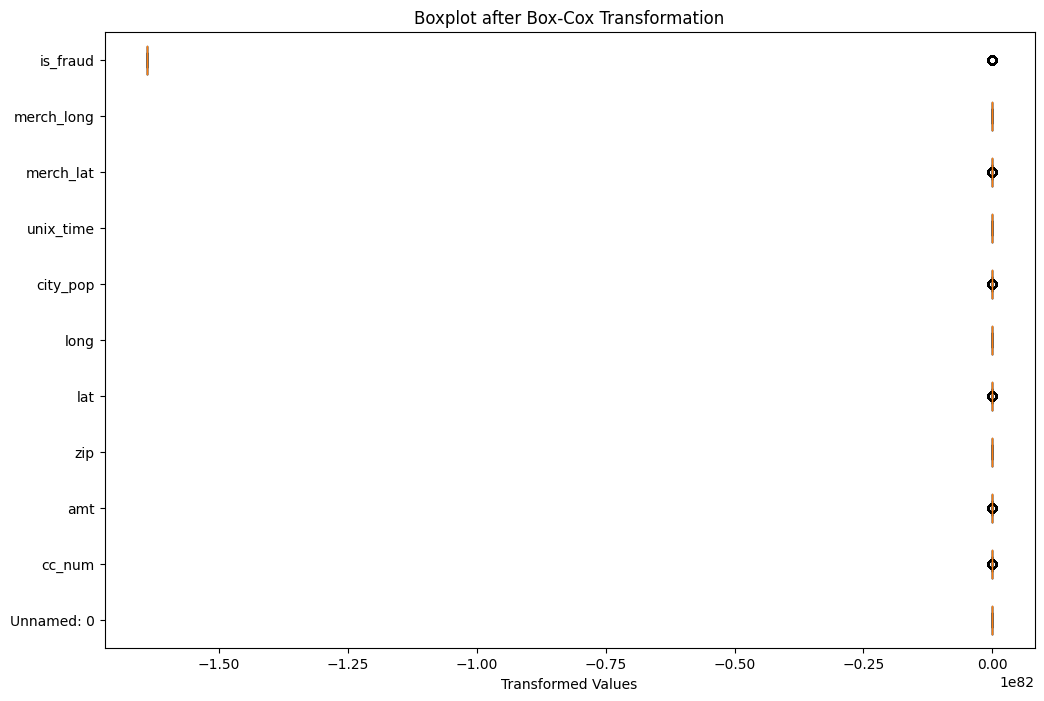

In [28]:
# Plot boxplots of the transformed columns
plt.figure(figsize=(12, 8))
plt.boxplot(transformed_numerical_columns.values, labels=num_cols, vert=False)
plt.title('Boxplot after Box-Cox Transformation')
plt.xlabel('Transformed Values')
plt.show()

In [29]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['first'] = data['first'].astype(str)
data['last'] = data['last'].astype(str)
data['gender'] = data['gender'].astype(str)
data['street'] = data['street'].astype(str)
data['city'] = data['city'].astype(str)
data['state'] = data['state'].astype(str)


In [30]:
# Convert 'dob' column to datetime
data['dob'] = pd.to_datetime(data['dob'])

# Extract year, month, and day from 'trans_date_trans_time' and 'dob' columns
data['trans_year'] = data['trans_date_trans_time'].dt.year
data['trans_month'] = data['trans_date_trans_time'].dt.month
data['trans_day'] = data['trans_date_trans_time'].dt.day
data['dob_year'] = data['dob'].dt.year
data['dob_month'] = data['dob'].dt.month
data['dob_day'] = data['dob'].dt.day


In [31]:
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,unix_time,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day,dob_year,dob_month,dob_day
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1325376018,36.011293,-82.048315,0,2019,1,1,1988,3,9
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1325376044,49.159047,-118.186462,0,2019,1,1,1978,6,21
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,1325376051,43.150704,-112.154481,0,2019,1,1,1962,1,19
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1325376076,47.034331,-112.561071,0,2019,1,1,1967,1,12
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,1325376186,38.674999,-78.632459,0,2019,1,1,1986,3,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,1388534347,39.946837,-91.333331,0,2020,12,31,1966,2,13
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,1388534349,29.661049,-96.186633,0,2020,12,31,1999,12,27
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,1388534355,46.658340,-119.715054,0,2020,12,31,1981,11,29
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,1388534364,44.470525,-117.080888,0,2020,12,31,1965,12,15


In [32]:
data.drop(columns=["Unnamed: 0", "trans_date_trans_time", "dob", 'trans_num', 'street'], inplace= True)


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 24 columns):
 #   Column       Dtype  
---  ------       -----  
 0   cc_num       int64  
 1   merchant     object 
 2   category     object 
 3   amt          float64
 4   first        object 
 5   last         object 
 6   gender       object 
 7   city         object 
 8   state        object 
 9   zip          int64  
 10  lat          float64
 11  long         float64
 12  city_pop     int64  
 13  job          object 
 14  unix_time    int64  
 15  merch_lat    float64
 16  merch_long   float64
 17  is_fraud     int64  
 18  trans_year   int32  
 19  trans_month  int32  
 20  trans_day    int32  
 21  dob_year     int32  
 22  dob_month    int32  
 23  dob_day      int32  
dtypes: float64(5), int32(6), int64(5), object(8)
memory usage: 310.9+ MB


In [34]:
cat_cols = data.select_dtypes(include = "object").columns
cat_cols

Index(['merchant', 'category', 'first', 'last', 'gender', 'city', 'state',
       'job'],
      dtype='object')

In [35]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

In [36]:
data

,cc_num,merchant,category,amt,first,last,gender,city,state,zip,...,unix_time,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day,dob_year,dob_month,dob_day
0,2703186189652095,514,8,4.97,164,18,0,532,27,28654,...,1325376018,36.011293,-82.048315,0,2019,1,1,1988,3,9
1,630423337322,241,4,107.23,312,161,0,619,47,99160,...,1325376044,49.159047,-118.186462,0,2019,1,1,1978,6,21
2,38859492057661,390,0,220.11,116,386,1,474,13,83252,...,1325376051,43.150704,-112.154481,0,2019,1,1,1962,1,19
3,3534093764340240,360,2,45.00,165,468,1,84,26,59632,...,1325376076,47.034331,-112.561071,0,2019,1,1,1967,1,12
4,375534208663984,297,9,41.96,339,153,1,217,45,24433,...,1325376186,38.674999,-78.632459,0,2019,1,1,1986,3,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,507,5,43.77,245,323,1,471,24,63453,...,1388534347,39.946837,-91.333331,0,2020,12,31,1966,2,13
555715,3556613125071656,264,7,111.84,180,438,1,427,43,77566,...,1388534349,29.661049,-96.186633,0,2020,12,31,1999,12,27
555716,6011724471098086,496,7,86.88,19,243,0,110,47,99323,...,1388534355,46.658340,-119.715054,0,2020,12,31,1981,11,29
555717,4079773899158,75,13,7.99,120,351,1,508,13,83643,...,1388534364,44.470525,-117.080888,0,2020,12,31,1965,12,15


In [37]:
data.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'trans_year', 'trans_month',
       'trans_day', 'dob_year', 'dob_month', 'dob_day'],
      dtype='object')

In [38]:
# Separating dependent and independent variables
X = data.drop(['is_fraud'], axis=1)
y = data.pop('is_fraud')


In [39]:
X.head()

,cc_num,merchant,category,amt,first,last,gender,city,state,zip,...,job,unix_time,merch_lat,merch_long,trans_year,trans_month,trans_day,dob_year,dob_month,dob_day
0,2703186189652095,514,8,4.97,164,18,0,532,27,28654,...,372,1325376018,36.011293,-82.048315,2019,1,1,1988,3,9
1,630423337322,241,4,107.23,312,161,0,619,47,99160,...,431,1325376044,49.159047,-118.186462,2019,1,1,1978,6,21
2,38859492057661,390,0,220.11,116,386,1,474,13,83252,...,308,1325376051,43.150704,-112.154481,2019,1,1,1962,1,19
3,3534093764340240,360,2,45.00,165,468,1,84,26,59632,...,330,1325376076,47.034331,-112.561071,2019,1,1,1967,1,12
4,375534208663984,297,9,41.96,339,153,1,217,45,24433,...,116,1325376186,38.674999,-78.632459,2019,1,1,1986,3,28


In [40]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [41]:
# Split data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train.head()

,cc_num,merchant,category,amt,first,last,gender,city,state,zip,...,job,unix_time,merch_lat,merch_long,trans_year,trans_month,trans_day,dob_year,dob_month,dob_day
1273644,6511349151405438,29,4,166.80,284,313,1,722,33,89319,...,254,1371108903,40.088507,-113.895268,2020,6,13,1946,8,24
601398,3566094707272327,536,11,28.86,208,418,0,574,4,91321,...,219,1347476946,35.356925,-119.348148,2019,9,12,1971,4,25
999645,3573030041201292,153,2,37.93,172,472,0,16,44,84002,...,406,1360819865,40.422976,-110.786285,2020,2,14,1990,1,17
1180310,213173753804333,677,9,18.70,181,446,1,589,15,46366,...,134,1367973195,40.254936,-85.751919,2020,5,8,1959,10,7
213847,373905417449658,688,8,33.54,296,33,0,507,43,76665,...,342,1378348271,32.397579,-97.395488,2020,9,5,1970,11,12


In [43]:
y_train.head()

1273644    0
601398     0
999645     0
1180310    0
213847     0
Name: is_fraud, dtype: int64

In [44]:
X_train.shape

(1481915, 23)

In [45]:
y_train.shape

(1481915,)

In [46]:
model = LogisticRegression()
model

LogisticRegression()

In [47]:
model.fit(X_train, y_train)

LogisticRegression()

In [48]:
# Predict on test set
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
                                           

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9984479552147355
Confusion Matrix:
[[368398    128]
 [   447   1506]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.92      0.77      0.84      1953

    accuracy                           1.00    370479
   macro avg       0.96      0.89      0.92    370479
weighted avg       1.00      1.00      1.00    370479



In [50]:
# Train Random Forest classifier
clf = RandomForestClassifier()
clf

RandomForestClassifier()

In [51]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
# Predict on test set
y_pred = clf.predict(X_test)

In [65]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
auc_roc= roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:\n", classification_rep)
print("Roc - auc score",auc_roc)

Accuracy: 0.9984479552147355
Confusion Matrix:
[[368398    128]
 [   447   1506]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.92      0.77      0.84      1953

    accuracy                           1.00    370479
   macro avg       0.96      0.89      0.92    370479
weighted avg       1.00      1.00      1.00    370479

Roc - auc score 0.8853870110672056


In [56]:
from xgboost import XGBClassifier

ml = XGBClassifier()
ml

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
ml.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [60]:
# Evaluate the Model perfomance
y_pred = ml.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
auc_roc= roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
print("Roc - auc score",auc_roc)

Accuracy: 0.9984479552147355
Confusion Matrix:
 [[368398    128]
 [   447   1506]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.92      0.77      0.84      1953

    accuracy                           1.00    370479
   macro avg       0.96      0.89      0.92    370479
weighted avg       1.00      1.00      1.00    370479

Roc - auc score 0.8853870110672056


In [70]:
if y_pred[1] == 1: # 0 meaning normal 1 meaning fraud
    print("Normal Transcation")
else:
    print("Fraud Transcation")

Fraud Transcation
